In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import utils.rd_plot_functions as pf  
import pandas as pd
sns.set_style('darkgrid')

# Model comparisons

In [18]:
rd_alts = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/alt_mods/coeffs/rd_alts')
rd_ica = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/ica/coeffs/rd_ica_v3')
rd_lca = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/nowht_v3/coeffs/rd_256_v3')
rd_rg = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/rg_zca/coeffs/rd_rg_zca_wht_v2_test')

In [19]:
frames = [rd_alts, rd_rg, rd_ica]
rd_alts = pd.concat(frames)
rd_alts = rd_alts.sort_values(['model', 'n_bins'])
rd_lca = rd_lca.sort_values(['model', 'n_bins'])

## Alternative models

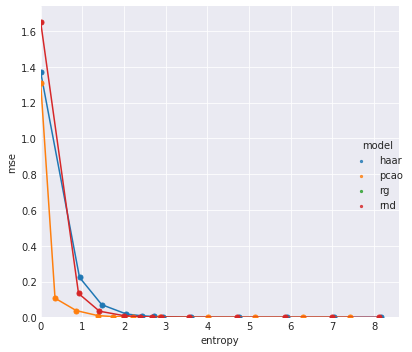

In [7]:
pf.alt_models_plots(rd_alts, y='mse')

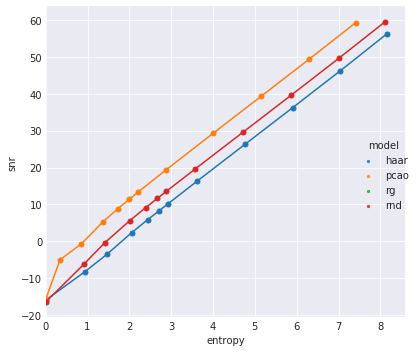

In [8]:
pf.alt_models_plots(rd_alts, y='snr')

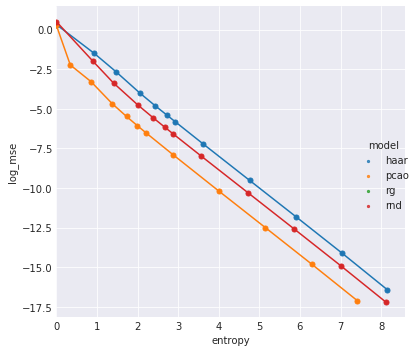

In [9]:
pf.alt_models_plots(rd_alts, y='log_mse')

## Full comparisons

In [10]:
rd_lca2 = rd_lca.where(rd_lca['lambda'] != '0.1')

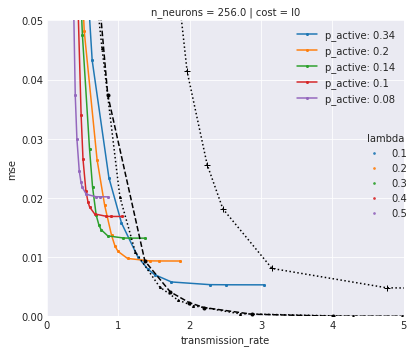

In [24]:
pf.full_comparison_plots(rd_lca.where(rd_lca['n_neurons'] == 256), alt_1=rd_alts.where(rd_alts.model=='pcao'), alt_2=rd_rg, alt_3=rd_ica, y='mse', x='transmission_rate',xlim=5.0,  ylim=0.05)